输入三条边长并用空格隔开: 3 4 5


三角形面积为:6.0000


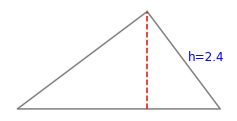

In [4]:
# %matplotlib inline
# 建议在jupyterlab中运行
 
import math
import numpy as np
import matplotlib.pyplot as plt
 
def judge(lines):
  """判断是否能组成三角形"""
  flag = 0
  for i in range(3):
    l1 = lines.copy() # 要copy，不然会对源进行修改
    r = l1.pop(i) # r被取出，l1剩余俩
    if (r>=sum(l1)):
      print("输入的边长无法构成三角形")
      break
    else:
      flag += 1
      continue
  if flag==3:
    return True
  else:
    return False
 
def plot_triangle():
  lines = input("输入三条边长并用空格隔开:")
  params = lines.split(" ")
  lines = list(map(lambda x:float(x),params))
  if judge(lines):
    p = sum(lines)/2
    a,b,c = lines
    area = math.sqrt(p*(p-a)*(p-b)*(p-c))
    width = max(lines)
    height = area/width*2
    # 计算角度
    lines = [a,b,c]
    idx_A = np.argmax(lines)
    A = lines.pop(idx_A)
    # 最长边作为底部边长，最左侧与坐标轴原点对齐
    B,C = lines
    # 根据三边长求两个水平夹角角度
    cos_C = (A**2+B**2-C**2)/(2*A*B)
    cos_B = (A**2+C**2-B**2)/(2*A*C)
    # 根据余弦值求得正切值
    k_C = math.tan(math.acos(cos_C))
    k_B = math.tan(math.acos(cos_B))
    # 根据正切值和高，获得边长
    w_C = height/k_C
    w_B = height/k_B
    # 确定三个顶点的坐标
    loc_A = (0,height)
    loc_B = (-w_B,0)
    loc_C = (w_C,0)
    plt.figure(figsize=(4,3))
    plt.plot([0,-w_B,w_C,0],[height,0,0,height],"gray")
    plt.plot([0,0],[0,height],"r--")
    plt.text(1,height/2,"h=%.1f"%(height),color="blue",fontsize=12)
    ax = plt.gca()
    ax.set_aspect(1) # 保证两条坐标轴scale一致
    plt.axis('off') # 关闭显示直角坐标系
    plt.savefig("./trianle.png",dpi=300)
    print("三角形面积为:%.4f"%(area))
 
if __name__=="__main__":
  plot_triangle()